In [32]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

In [30]:
df = pd.read_csv('data/wtw 2012 to 2017-05-30.csv',parse_dates=True,index_col=0)

In [14]:
df = pd.read_csv('data/wtw 2016 to 2017 1 year.csv',parse_dates=True,index_col=0)

### 100 day moving average
# min_periods=0...if NaN it gives you average of what you have
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

             Open   High    Low  Close   Volume      100ma
Date                                                      
2016-06-24  12.71  13.08  12.29  12.34  2027223  12.340000
2016-06-27  12.16  12.44  10.74  10.83  2234095  11.585000
2016-06-28  11.73  11.87  11.29  11.41  1390300  11.526667
2016-06-29  11.71  11.80  11.45  11.57  1408854  11.537500
2016-06-30  11.67  11.70  11.34  11.63  2163324  11.556000


In [31]:
## this drops any rows that have NaN in them
df.dropna(inplace=True)
print(df.head())

             Open   High    Low  Close  Volume    100ma
Date                                                   
2016-11-14  12.25  12.65  12.05  12.13  995722  10.8894
2016-11-15  12.02  12.15  11.81  11.98  498350  10.8858
2016-11-16  11.90  12.03  11.81  11.88  428029  10.8963
2016-11-17  11.92  11.97  11.57  11.59  521320  10.8981
2016-11-18  11.56  11.68  11.24  11.26  540766  10.8950


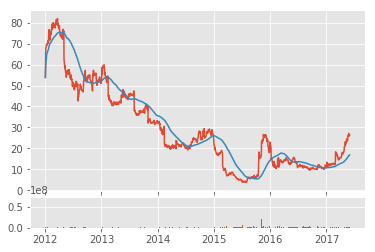

In [7]:
###---- line graph with closing price and 100 day moving average
###---- bar graph is below with volume
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
#sharex=ax1...if you zoom ax1 you also zoom volume
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

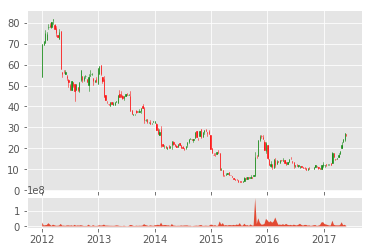

In [39]:
####------ combine data to make it 10 day data AND make candlesticks

df = pd.read_csv('data/wtw 2012 to 2017-05-30.csv',parse_dates=True,index_col=0)

df_ohlc = df['close'].resample('10D').ohlc() #gets avg value over 10 days
df_volume = df['volume'].resample('10D').sum() #gets true volume over 10 days

#make data columns format correct for candlestick plot
df_ohlc.reset_index(inplace=True) # reset index
df_ohlc['date'] = df_ohlc['date'].map(mdates.date2num) # correct date format for mdates





ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date() #display as beautiful dates

#add candlestick stuff and ax2 for better clarity
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0) #fill from 0 to y
plt.show()